How well do jobs and skills pay for Data Analyst in the philippines

Methodology 
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for data analysts
3. Visualize for highest paying skills and most demand skills

In [14]:
#import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data
df = pd.read_csv("data_jobs.csv")


#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#Convert Job Skills from String to List
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_ph = df[(df['job_country'] == 'Philippines')].dropna(subset=['salary_year_avg'])

In [16]:
df_ph

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25063,Data Engineer,Python Data Engineer,"Mandaluyong, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-02-24 13:42:17,False,False,Philippines,year,96773.0,NaN,ConnectOS,"[python, php, linux]","{'os': ['linux'], 'programming': ['python', 'p..."
28603,Business Analyst,SAP BI Analyst,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-05 13:20:30,False,False,Philippines,year,63000.0,NaN,Avaloq,"[go, sap, tableau, flow]","{'analyst_tools': ['sap', 'tableau'], 'other':..."
64725,Senior Data Analyst,Senior Data Analyst - Artificial Intelligence COE,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-04-26 06:43:51,False,False,Philippines,year,111175.0,NaN,Security Bank,"[sas, sas, r, python]","{'analyst_tools': ['sas'], 'programming': ['sa..."
68035,Senior Data Engineer,Senior Data Engineer,"Davao City, Davao del Sur, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-08-01 06:23:52,True,False,Philippines,year,96773.0,NaN,Boldr,"[sql, python, java, c++, scala, php, aws, reds...","{'cloud': ['aws', 'redshift'], 'libraries': ['..."
73618,Data Engineer,Data Engineer (Analytics),"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-01-17 00:54:53,False,False,Philippines,year,147500.0,NaN,Avaloq,"[sql, javascript]","{'programming': ['sql', 'javascript']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752618,Senior Data Analyst,Senior Digital Analytics Consultant,"Cebu City, Cebu, Philippines",via Wellfound,Full-time,False,Philippines,2023-10-02 20:36:21,True,False,Philippines,year,95000.0,NaN,InfoTrust,NaN,NaN
766072,Business Analyst,Junior Business Information Research Analyst,"Manila, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-04-01 01:24:56,False,False,Philippines,year,50400.0,NaN,RepRisk AG,NaN,NaN
771977,Data Scientist,Data Scientist - New College Graduate,"Biñan, Laguna, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-05-12 01:21:47,False,False,Philippines,year,69962.5,NaN,Western Digital,"[python, r, sql, numpy, pandas, matplotlib, ta...","{'analyst_tools': ['tableau'], 'libraries': ['..."
777328,Data Analyst,Data Product Manager,"Makati, Metro Manila, Philippines",via Ai-Jobs.net,Full-time,False,Philippines,2023-07-04 05:15:58,False,False,Philippines,year,64800.0,NaN,Angkas,"[python, r, sql, tableau, looker, power bi]","{'analyst_tools': ['tableau', 'looker', 'power..."


In [17]:
job_titles =df_ph['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [18]:
df_ph_top6 = df_ph[df_ph['job_title_short'].isin(job_titles)]

In [19]:
job_order= df_ph_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

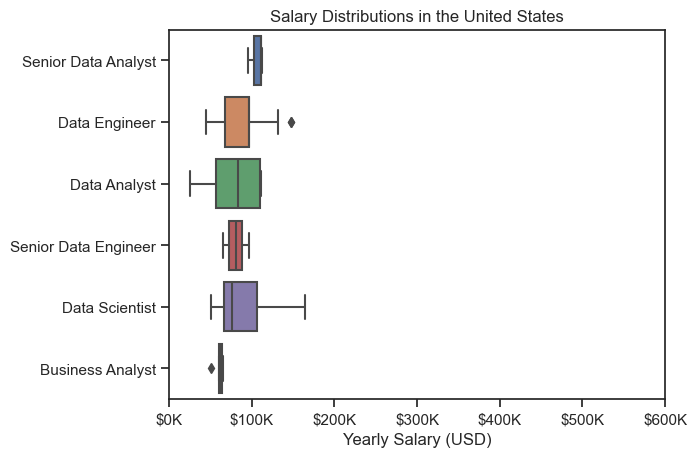

In [20]:
sns.boxplot(data=df_ph_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0 , 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary vs Skill for Data Analyst 

In [21]:
df_da_ph = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Philippines')].copy()


df_da_ph = df_da_ph.dropna(subset=['salary_year_avg'])
df_da_ph = df_da_ph.dropna(subset=['job_skills'])

In [22]:
df_da_ph = df_da_ph.explode('job_skills')

df_da_ph[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
115695,111175.0,excel
115695,111175.0,tableau
166142,111175.0,sql
166142,111175.0,flow
171324,109500.0,excel


Top pay Data Frame

In [23]:
df_da_top_pay = df_da_ph.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_da_top_pay = df_da_top_pay.head(10)

df_da_top_pay

,count,median
job_skills,,
bigquery,1,111175.0
flow,1,111175.0
sheets,1,111175.0
c,1,111175.0
zoom,1,111175.0
sharepoint,1,109500.0
qlik,1,100500.0
python,7,100500.0
tableau,7,100500.0


Most popular jobs data frame

In [24]:
df_da_skills = df_da_ph.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)
df_da_skills 

,count,median
job_skills,,
sql,13,100500.0
tableau,7,100500.0
python,7,100500.0
r,6,100500.0
powerpoint,3,100500.0
jira,2,100189.5
snowflake,3,98500.0
excel,9,89204.0
power bi,5,69900.0


C:\Users\chavi\AppData\Local\Temp\ipykernel_24852\4197129845.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\chavi\AppData\Local\Temp\ipykernel_24852\4197129845.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().remove()


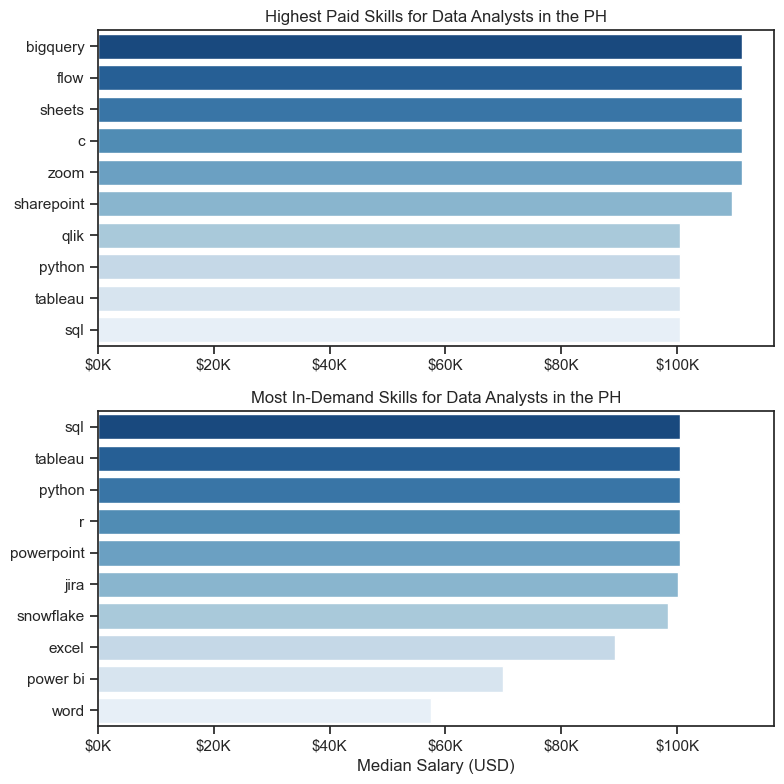

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Sort the data by median salary (highest to lowest)
df_top_sorted = df_da_top_pay.sort_values(by='median', ascending=False)
df_skills_sorted = df_da_skills.sort_values(by='median', ascending=False)

# Highest Paid Skills
sns.barplot(
    data=df_top_sorted,
    x='median',
    y=df_top_sorted.index,
    order=df_top_sorted.index,  # Sorted top to bottom
    palette=sns.color_palette("Blues", n_colors=10)[::-1],
    ax=ax[0]
)
ax[0].set_title('Highest Paid Skills for Data Analysts in the PH')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

# Most In-Demand Skills (still showing salary but based on demand)
sns.barplot(
    data=df_skills_sorted,
    x='median',
    y=df_skills_sorted.index,
    order=df_skills_sorted.index,
    palette=sns.color_palette("Blues", n_colors=10)[::-1],
    ax=ax[1]
)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the PH')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
